In [1]:
import os
import cv2
import glob
import h5py
from scipy.io import loadmat
import numpy as np
from tqdm import tqdm
from utils import get_density_map_gaussian
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
%matplotlib inline


with_direction = False

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
from data import CrowdDataSet 
import matplotlib.pyplot as plt
import numpy as np
from data import CrowdDataSet, CrowdClassificationDataSet
from data import default_train_transforms, default_val_transforms, default_train_transform_classification, default_val_transform_classification
from torchvision import transforms
from PIL import Image
from utils import get_density_map_gaussian

In [4]:
ds = CrowdDataSet('part_A/train_data/')

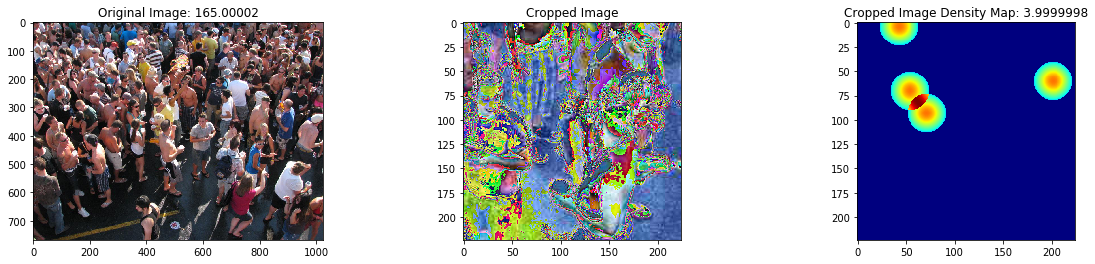

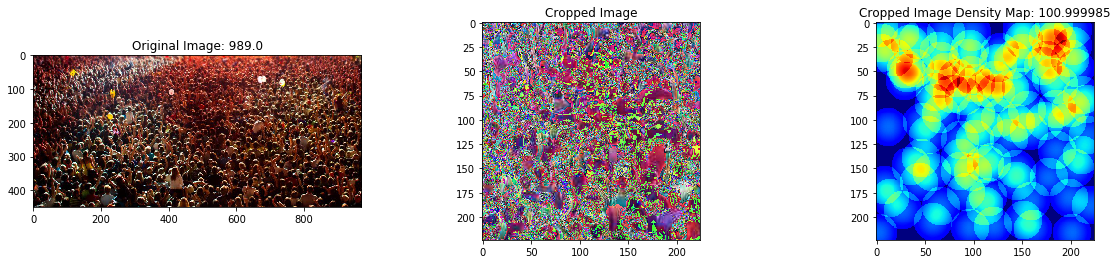

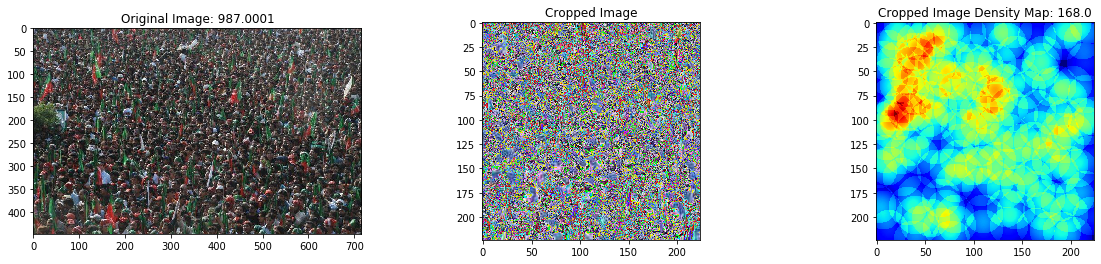

In [9]:
for i in [56, 57, 58]:
    fg, (p1, p2, p3) = plt.subplots(1, 3, figsize=(20, 4))

    x = ds[i]
    p1.imshow(x['image'])
    p1.set_title("Original Image: " + str(np.sum(x['den'])))

    loaders = {
        "train": CrowdDataSet(
            'part_A/train_data', default_train_transforms()
        ),
        "val": CrowdDataSet(
            'part_A/test_data', default_val_transforms()
        )
    }

    transformed_img = transforms.ToPILImage()(loaders['train'][i]['image']).convert('RGB')
    p2.imshow(transformed_img)
    p2.set_title("Cropped Image")

    k = np.zeros((transformed_img.width, transformed_img.height))
    k = get_density_map_gaussian(k, loaders['train'][i]['gt'], adaptive_mode=False)
    p3.imshow(k, cmap=plt.cm.jet)
    p3.set_title('Cropped Image Density Map: ' + str(np.sum(k)))

In [10]:
total = []

for i in loaders['train']:
    total.append(len(i['gt']))

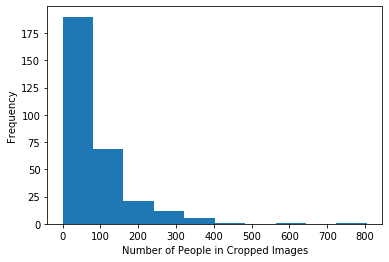

In [14]:
plt.hist(total)
plt.xlabel('Number of People in Cropped Images')
plt.ylabel('Frequency')
plt.show()

In [8]:
loaders = {
    "train": CrowdClassificationDataSet(
        'part_A/train_data', default_train_transform_classification()
    ),
    "val": CrowdClassificationDataSet(
        'part_A/test_data', default_val_transform_classification()
    )
}

In [7]:
import pandas as pd

pd.qcut([dt['num'] for dt in loaders['train']], 5, labels=False, retbins=True)

(array([4, 2, 1, 1, 2, 0, 4, 0, 1, 0, 2, 4, 3, 0, 2, 4, 3, 2, 0, 3, 1, 3,
        0, 2, 4, 1, 4, 0, 3, 0, 0, 2, 4, 0, 1, 4, 4, 0, 2, 1, 4, 3, 1, 3,
        2, 1, 0, 3, 2, 4, 4, 0, 0, 1, 0, 4, 0, 3, 4, 3, 3, 2, 2, 2, 0, 0,
        3, 0, 0, 0, 2, 0, 4, 3, 2, 1, 1, 1, 3, 4, 4, 2, 1, 1, 2, 2, 2, 3,
        0, 2, 3, 1, 1, 4, 4, 2, 4, 1, 0, 4, 4, 0, 3, 0, 1, 1, 0, 1, 3, 4,
        2, 3, 1, 0, 4, 1, 4, 0, 0, 2, 1, 2, 3, 0, 4, 1, 0, 1, 3, 3, 0, 3,
        4, 4, 1, 1, 4, 2, 2, 0, 2, 2, 0, 2, 4, 0, 3, 1, 0, 2, 3, 1, 0, 4,
        2, 0, 0, 4, 0, 3, 1, 1, 1, 4, 1, 2, 3, 1, 3, 3, 2, 4, 1, 3, 0, 4,
        4, 1, 3, 2, 2, 4, 3, 1, 1, 3, 4, 4, 2, 2, 3, 2, 0, 2, 1, 3, 3, 2,
        0, 2, 4, 0, 1, 2, 3, 4, 1, 1, 4, 3, 3, 3, 2, 0, 2, 0, 4, 4, 3, 0,
        4, 4, 3, 1, 0, 4, 0, 0, 4, 0, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 1, 2,
        3, 3, 2, 4, 4, 4, 4, 2, 3, 1, 4, 3, 4, 3, 4, 2, 0, 4, 2, 0, 2, 2,
        2, 1, 1, 4, 2, 3, 2, 1, 2, 0, 4, 0, 1, 4, 2, 1, 3, 0, 2, 3, 3, 3,
        3, 1, 1, 1, 0, 3, 3, 3, 4, 3, 

In [8]:
nums = []
for data in loaders['train']:
    dt = data
    
    b = dt['bin']
    num = dt['num']
    nums.append(b)

In [9]:
print(sum([True if x == 0 else False for x in nums]))
print(sum([True if x == 1 else False for x in nums]))
print(sum([True if x == 2 else False for x in nums]))
print(sum([True if x == 3 else False for x in nums]))
print(sum([True if x == 4 else False for x in nums]))
print(len(nums))

60
59
60
60
60
300


In [1]:
import torchvision.models as models
import torch.nn as nn

In [16]:
conv_layers = list(models.vgg16(pretrained=True).features.children())
for layer in conv_layers:
    layer.requires_grad = False

model = nn.Sequential(
    *conv_layers,
    nn.Conv2d(512, 128, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(128, 1, kernel_size=3, padding=1),
    nn.ReLU(inplace=True)
)

model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [2]:
conv_layers = list(models.resnet18(pretrained=True).children())[:8]
for layer in conv_layers:
    layer.requires_grad = False

model = nn.Sequential(
    *conv_layers,
    nn.Conv2d(512, 128, kernel_size=3, padding=1),
    nn.ReLU(inplace=True),
    nn.Conv2d(128, 1, kernel_size=3, padding=1),
    nn.ReLU(inplace=True)
)

model

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con